In [39]:
import pandas as pd

from sqlalchemy import create_engine

import numpy as np

from config import user, passw, host, port, name

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from scipy.stats import linregress

import seaborn as sns

In [29]:
physio = pd.read_csv('../data/physio.csv')
sleep = pd.read_csv('../data/sleeps.csv')
workouts = pd.read_csv('../data/workouts.csv')

In [30]:
physio.columns

Index(['Cycle start time', 'Cycle end time', 'Cycle timezone',
       'Recovery score %', 'Resting heart rate (bpm)',
       'Heart rate variability (ms)', 'Skin temp (celsius)', 'Blood oxygen %',
       'Day Strain', 'Energy burned (cal)', 'Max HR (bpm)', 'Average HR (bpm)',
       'Sleep onset', 'Wake onset', 'Sleep performance %',
       'Respiratory rate (rpm)', 'Asleep duration (min)',
       'In bed duration (min)', 'Light sleep duration (min)',
       'Deep (SWS) duration (min)', 'REM duration (min)',
       'Awake duration (min)', 'Sleep need (min)', 'Sleep debt (min)',
       'Sleep efficiency %'],
      dtype='object')

In [31]:
physio.rename(columns={
    "Cycle start time":"cycle_start",
    "Cycle end time":"cycle_end",
    "Cycle timezone":"cycle_timezone",
    "Recovery score %":"recovery_score",
    "Resting heart rate (bpm)":"resting_heart_rate",
    "Heart rate variability (ms)":"heart_rate_variability",
    "Skin temp (celsius)":"skin_temp",
    "Blood oxygen %":"blood_oxygen",
    "Day Strain":"day_strain",
    "Energy burned (cal)":"energy_burned",
    "Max HR (bpm)":"max_hr",
    "Average HR (bpm)":"average_hr",
    "Sleep onset":"sleep_onset",
    "Wake onset":"wake_onset",
    "Sleep performance %":"sleep_performance",
    "Respiratory rate (rpm)":"respiratory_rate",
    "Asleep duration (min)":"asleep_duration",
    "In bed duration (min)":"in_bed_duration",
    "Light sleep duration (min)":"light_sleep_duration",
    "Deep (SWS) duration (min)":"deep_sws_duration",
    "REM duration (min)":"rem_duration",
    "Awake duration (min)":"awake_duration",
    "Sleep need (min)":"sleep_need",
    "Sleep debt (min)":"sleep_debt",
    "Sleep efficiency %":"sleep_efficiency"
}, inplace=True)

physio.head()

,cycle_start,cycle_end,cycle_timezone,recovery_score,resting_heart_rate,heart_rate_variability,skin_temp,blood_oxygen,day_strain,energy_burned,...,respiratory_rate,asleep_duration,in_bed_duration,light_sleep_duration,deep_sws_duration,rem_duration,awake_duration,sleep_need,sleep_debt,sleep_efficiency
0,2023-02-21 22:59:07,NaN,UTC-05:00,58.0,51.0,54.0,35.20,96.54,NaN,NaN,...,15.5,366.0,406.0,245.0,74.0,47.0,40.0,469.0,0.0,90.0
1,2023-02-20 23:46:08,2023-02-21 22:59:07,UTC-05:00,89.0,49.0,62.0,34.60,97.00,2.9,1611.0,...,15.5,562.0,655.0,439.0,93.0,30.0,93.0,471.0,0.0,85.0
2,2023-02-19 23:09:10,2023-02-20 23:46:08,UTC-05:00,88.0,49.0,62.0,34.80,97.34,5.9,1720.0,...,15.4,575.0,684.0,368.0,118.0,89.0,109.0,487.0,12.0,85.0
3,2023-02-18 23:51:42,2023-02-19 23:09:10,UTC-05:00,72.0,52.0,55.0,34.80,97.17,8.4,1757.0,...,15.8,530.0,589.0,309.0,154.0,67.0,59.0,553.0,49.0,91.0
4,2023-02-17 22:33:06,2023-02-18 23:51:42,UTC-05:00,86.0,49.0,60.0,35.14,96.67,14.9,2640.0,...,16.2,374.0,445.0,272.0,68.0,34.0,71.0,471.0,0.0,86.0


In [32]:
physio.drop('cycle_timezone', axis = 1, inplace=True)

In [33]:
physio = physio[physio['recovery_score'] >= 65]
physio

,cycle_start,cycle_end,recovery_score,resting_heart_rate,heart_rate_variability,skin_temp,blood_oxygen,day_strain,energy_burned,max_hr,...,respiratory_rate,asleep_duration,in_bed_duration,light_sleep_duration,deep_sws_duration,rem_duration,awake_duration,sleep_need,sleep_debt,sleep_efficiency
1,2023-02-20 23:46:08,2023-02-21 22:59:07,89.0,49.0,62.0,34.60,97.00,2.9,1611.0,115.0,...,15.5,562.0,655.0,439.0,93.0,30.0,93.0,471.0,0.0,85.0
2,2023-02-19 23:09:10,2023-02-20 23:46:08,88.0,49.0,62.0,34.80,97.34,5.9,1720.0,130.0,...,15.4,575.0,684.0,368.0,118.0,89.0,109.0,487.0,12.0,85.0
3,2023-02-18 23:51:42,2023-02-19 23:09:10,72.0,52.0,55.0,34.80,97.17,8.4,1757.0,137.0,...,15.8,530.0,589.0,309.0,154.0,67.0,59.0,553.0,49.0,91.0
4,2023-02-17 22:33:06,2023-02-18 23:51:42,86.0,49.0,60.0,35.14,96.67,14.9,2640.0,157.0,...,16.2,374.0,445.0,272.0,68.0,34.0,71.0,471.0,0.0,86.0
5,2023-02-16 22:52:48,2023-02-17 22:33:06,96.0,49.0,68.0,34.40,97.52,5.5,1547.0,131.0,...,15.9,608.0,707.0,473.0,91.0,44.0,99.0,474.0,0.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,2022-08-22 01:15:11,2022-08-23 00:47:46,83.0,47.0,60.0,33.60,95.84,10.8,2079.0,140.0,...,15.7,399.0,439.0,239.0,96.0,64.0,40.0,518.0,39.0,90.0
184,2022-08-18 22:22:41,2022-08-19 23:16:16,68.0,49.0,56.0,34.30,94.35,12.2,2258.0,149.0,...,16.1,555.0,627.0,401.0,111.0,43.0,72.0,473.0,0.0,90.0
185,2022-08-17 23:23:45,2022-08-18 22:22:41,71.0,49.0,57.0,34.40,93.46,6.5,1723.0,128.0,...,16.1,505.0,571.0,380.0,105.0,20.0,66.0,478.0,3.0,88.0
187,2022-08-15 22:59:54,2022-08-16 23:37:08,94.0,47.0,68.0,33.20,96.11,8.8,1928.0,128.0,...,16.1,393.0,448.0,226.0,85.0,82.0,55.0,528.0,53.0,87.0


In [34]:
def to_farenheit(df):
    df = round(df.assign(skin_temp = lambda x: (x['skin_temp'] * 9/5) + 32), 2)
    return df

In [35]:
physio = to_farenheit(physio)

d = physio.drop(columns=(['cycle_start', 'cycle_end', 'sleep_onset', 'wake_onset']), axis=1)

d.head()

,recovery_score,resting_heart_rate,heart_rate_variability,skin_temp,blood_oxygen,day_strain,energy_burned,max_hr,average_hr,sleep_performance,respiratory_rate,asleep_duration,in_bed_duration,light_sleep_duration,deep_sws_duration,rem_duration,awake_duration,sleep_need,sleep_debt,sleep_efficiency
1,89.0,49.0,62.0,94.28,97.00,2.9,1611.0,115.0,56.0,100.0,15.5,562.0,655.0,439.0,93.0,30.0,93.0,471.0,0.0,85.0
2,88.0,49.0,62.0,94.64,97.34,5.9,1720.0,130.0,60.0,100.0,15.4,575.0,684.0,368.0,118.0,89.0,109.0,487.0,12.0,85.0
3,72.0,52.0,55.0,94.64,97.17,8.4,1757.0,137.0,64.0,96.0,15.8,530.0,589.0,309.0,154.0,67.0,59.0,553.0,49.0,91.0
4,86.0,49.0,60.0,95.25,96.67,14.9,2640.0,157.0,67.0,79.0,16.2,374.0,445.0,272.0,68.0,34.0,71.0,471.0,0.0,86.0
5,96.0,49.0,68.0,93.92,97.52,5.5,1547.0,131.0,60.0,100.0,15.9,608.0,707.0,473.0,91.0,44.0,99.0,474.0,0.0,87.0


The R-squared value for this relationship is: 0.804754858926126


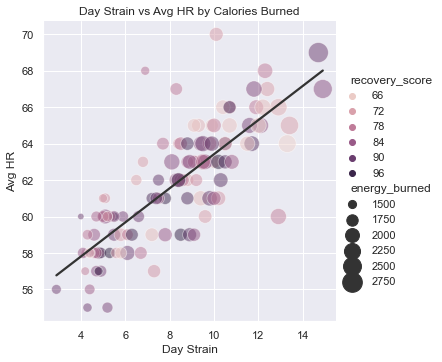

In [64]:
sns.set_theme()

slope, intercept, r_value, p_value, std_err = linregress(physio['day_strain'], physio['average_hr'])

sns.relplot(x = physio['day_strain'], y = physio['average_hr'], 
            hue = physio['recovery_score'], size=physio['energy_burned'], 
            alpha=0.5 ,sizes=(40,400))
z = np.polyfit(physio['day_strain'], physio['average_hr'], 1)
p = np.poly1d(z)
plt.title('Day Strain vs Avg HR by Calories Burned')
sns.regplot(x = physio['day_strain'], y = p(physio['day_strain']), scatter=False, color='.2')
plt.xlabel('Day Strain')
plt.ylabel('Avg HR')

print(f'The R-squared value for this relationship is: {r_value}')

The R-squared value for this relationship is: 0.6920530753654982


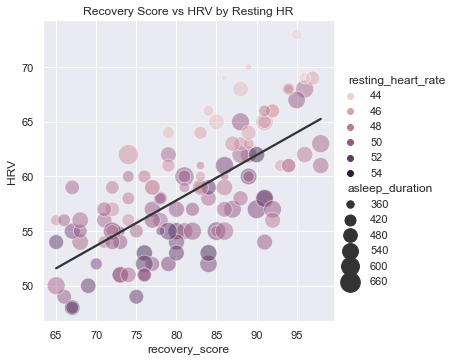

In [65]:
sns.set_theme()

slope, intercept, r_value, p_value, std_err = linregress(physio['recovery_score'], physio['heart_rate_variability'])

sns.relplot(x = physio['recovery_score'], y = physio['heart_rate_variability'], 
            hue=physio['resting_heart_rate'], size=physio['asleep_duration'],
           alpha=0.5, sizes=(40,400))
x = np.polyfit(physio['recovery_score'], physio['heart_rate_variability'], 1)
r = np.poly1d(x)
plt.title('Recovery Score vs HRV by Resting HR')
plt.xlabel('Recovery Score')
plt.ylabel('HRV')
sns.regplot(x = physio['recovery_score'], y = r(physio['recovery_score']), 
            scatter=False, color='.2')

print(f'The R-squared value for this relationship is: {r_value}')

In [ ]:
sleep.columns

In [ ]:
sleep.rename(columns={
    'Cycle start time':'cycle_start', 
    'Cycle end time':'cycle_end', 
    'Cycle timezone':'cycle_timezone',
    'Sleep onset':'sleep_onset',
    'Wake onset':'wake_onset', 
    'Sleep performance %':'sleep_performance', 
    'Respiratory rate (rpm)':'repiratory_rate',
    'Asleep duration (min)':'asleep_duration',
    'In bed duration (min)':'in_bed_duration',
    'Light sleep duration (min)':'light_sleep_duration', 
    'Deep (SWS) duration (min)':'deep_sws_duration',
    'REM duration (min)':'rem_duration', 
    'Awake duration (min)':'awake_duration', 
    'Sleep need (min)':'sleep_need',
    'Sleep debt (min)':'sleep_debt', 
    'Sleep efficiency %':'sleep_efficiency', 
    'Nap':'nap'
}, inplace=True)

sleep.head()

In [ ]:
workouts.columns

In [ ]:
workouts.rename(columns={
    'Cycle start time':'cycle_start',
    'Cycle end time':'cycle_end', 
    'Cycle timezone':'cycle_timezone',
    'Workout start time':'workout_start', 
    'Workout end time':'workout_end', 
    'Duration (min)':'duration',
    'Activity name':'activity_name', 
    'Activity Strain':'activity_strain', 
    'Energy burned (cal)':'calories_burned',
    'Max HR (bpm)':'max_hr', 
    'Average HR (bpm)':'average_hr', 
    'HR Zone 1 %':'hr_zone_1', 
    'HR Zone 2 %':'hr_zone_2',
    'HR Zone 3 %':'hr_zone_3', 
    'HR Zone 4 %':'hr_zone_4', 
    'HR Zone 5 %':'hr_zone_5', 
    'GPS enabled':'gps',
    'Distance (meters)':'distance',
    'Altitude gain (meters)':'altitude_gain',
    'Altitude change (meters)':'altitude_change'
}, inplace=True)

workouts.head()

In [ ]:
workouts.drop(columns=['altitude_gain', 'altitude_change', 'cycle_timezone'], inplace=True)

In [ ]:
workouts.head()

In [ ]:
workouts['activity_name'].unique()